# 新歓 Hands-on 🚀

このハンズオンでは、アルファベットを認識するモデルを学習させて、どのような挙動をするのかを分析することです。

注意：今回使用するコードは発展的な内容なので、どんな仕組みで動いているのかを理解する必要はありません。  
　　　ただ、できればどんな目的で動かしているのかには注目してみて欲しいです。

## 初期設定

まず、今回使用するツールの初期設定をします。特に重要なことはないので内容の説明はスルーします。

1. あなたの作業が保存されるようにするために「ドライブにコピー」というボタンを押して下さい。

<img src="https://github.com/yuji96/data-science-notes/blob/main/%E6%96%B0%E6%AD%93hands-on/img/drive.png?raw=true" width="400"/>

2. メニューのランタイムから、ランタイプのタイプを GPU に変更して下さい。

<img src="https://github.com/yuji96/data-science-notes/blob/main/%E6%96%B0%E6%AD%93hands-on/img/GPU1.png?raw=true" width="500"/>

<img src="https://github.com/yuji96/data-science-notes/blob/main/%E6%96%B0%E6%AD%93hands-on/img/GPU2.png?raw=true" width="300"/>


↓ この下にマウスのカーソルを持ってくると「▶」みたいな形をした実行ボタンが現れるので、押して実行して下さい。

In [ ]:
import tensorflow as tf
assert tf.config.experimental.list_physical_devices('GPU'), "ランタイムを GPU に切り替えて下さい。"

続けて下の3つのコードも実行して下さい。

In [ ]:
!pip install -qq emnist
!pip install -qq japanize-matplotlib
!pip install -qq jupyter_dash
!pip install -qq git+https://github.com/plotly/dash-canvas.git@df6e16db3ee56e93674faff6b1d2dd28ef4b3094

     |████████████████████████████████| 4.1 MB 5.4 MB/s 
     |████████████████████████████████| 9.6 MB 6.5 MB/s 
     |████████████████████████████████| 357 kB 22.6 MB/s 


In [ ]:
from IPython.display import Javascript
import matplotlib.pyplot as plt
import numpy as np

import japanize_matplotlib

plt.rcParams["font.size"] = 18

tf.random.set_seed(0)
print(tf.__version__)

2.8.0


## データ準備

それではハンズオンの内容に入っていきます。

今回使用する EMNIST と呼ばれるデータセットをダウンロードします。（データは Google が提供する無料貸出サーバー上にダウンロードされるので、あなたの PC や Google ドライブには影響ありません。）

このコードの実行には少し時間がかかるかもしれません。

In [ ]:
from string import digits, ascii_uppercase, ascii_lowercase
from emnist import extract_training_samples, extract_test_samples

train_x, train_t = extract_training_samples('byclass')
test_x, test_t = extract_test_samples('byclass')

labels = list(digits + ascii_uppercase + ascii_lowercase)
target_to_label = {target: label for target, label in enumerate(labels)}

どのようなデータセットなのかを少し覗いてみます。

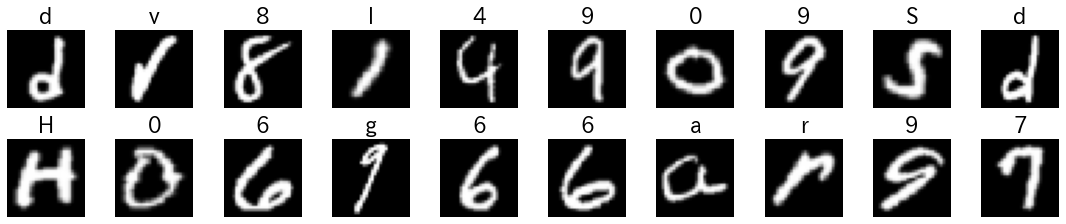

In [ ]:
indexes = np.random.randint(train_x.shape[0], size=20)

fig, axes = plt.subplots(2, 10, constrained_layout=True, figsize=[15, 3])
for ax, image, target in zip(axes.flatten(), train_x[indexes], train_t[indexes]):
    ax.imshow(image, cmap='gray')
    ax.set_title(f'{target_to_label[target]}')
    ax.axis("off")

画像データとそれに対応するラベルが表示されました。  
「9」って書いてあるけど「q」に見えるなーってものもあると思います。  
上のセルは実行するたびに表示される画像は変わるので、他の画像も見たい方はもう一度実行してみて下さい。

今回のゴールは、ラベルが付いていない画像がなんのアルファベットなのかを AI に当てさせることです。

## モデルを〇〇する

### 構築する

今回構築するモデルは**ニューラルネットワーク**です。名前だけなら聞いたことある人は多いかもしれません。
ニューラルネットワークはいくつかの**ユニット**と、それを束にした**レイヤー（layer）**を積み重ねることで成り立ちます。このレイヤーが多い状態を「深い（Deep）」というので、**Deep Learning** という言葉が生まれました。

<img src="https://github.com/yuji96/data-science-notes/blob/main/%E6%96%B0%E6%AD%93hands-on/img/mlp.jpeg?raw=true" width="500"/>

画像出典: https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37

今回はニューラルネットワークの隠れ層（hidden layer）を各々で作ってもらいます。
近年は便利なツールを使うことで簡単に書くことができるので安心して下さい。

例えば、上図のニューラルネットワークを作りたければ
```python
hidden_layers = [
    HiddenLayer(4),
    HiddenLayer(4),
]
```
とすれば４つのユニットを持ったレイヤーが２個積み重なったニューラルネットワークを作ることができます。

アドバイス：
- レイヤーの数は 3〜10 くらいが良さそう。
- １つのレイヤーにおけるユニットの数は 100〜700 くらいが良さそう。

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Input

def HiddenLayer(units: int):
    return Dense(units, activation="relu")

In [ ]:
hidden_layers = [
]

# 例えばこんな感じ
hidden_layers = [
#     HiddenLayer(600),  ← 最後にカンマ 「,」 を付けるのを忘れないようにする。
    HiddenLayer(600),
    HiddenLayer(500),
    HiddenLayer(400),
    HiddenLayer(300),
    HiddenLayer(200),
    HiddenLayer(100),
]

your_model = tf.keras.Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(),
    *hidden_layers,
    Dense(62, activation="softmax"),
])
your_model.compile(optimizer="adam",
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
your_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 600)               471000    
                                                                 
 dense_15 (Dense)            (None, 500)               300500    
                                                                 
 dense_16 (Dense)            (None, 400)               200400    
                                                                 
 dense_17 (Dense)            (None, 300)               120300    
                                                                 
 dense_18 (Dense)            (None, 200)               60200     
                                                                 
 dense_19 (Dense)            (None, 100)              

### 学習する

先ほど構築したモデルを学習させます。実行にかなり時間がかかります。

In [ ]:
def fit(model):
    display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 100})'''))
    es = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True, verbose=1)
    model.compile(optimizer="adam",
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])
    return model.fit(train_x, train_t, batch_size=3000, epochs=20, validation_split=0.2, callbacks=[es])


assert tf.config.experimental.list_physical_devices('GPU'), "ランタイムを GPU に切り替えて下さい。"
history1 = fit(your_model)

<IPython.core.display.Javascript object>

Epoch 1/20
187/187 [==============================] - 7s 33ms/step - loss: 2.6617 - accuracy: 0.5697 - val_loss: 0.9030 - val_accuracy: 0.7317
Epoch 2/20
187/187 [==============================] - 4s 23ms/step - loss: 0.7409 - accuracy: 0.7703 - val_loss: 0.7189 - val_accuracy: 0.7683
Epoch 3/20
187/187 [==============================] - 4s 23ms/step - loss: 0.6039 - accuracy: 0.8035 - val_loss: 0.5932 - val_accuracy: 0.8049
Epoch 4/20
187/187 [==============================] - 4s 21ms/step - loss: 0.5412 - accuracy: 0.8191 - val_loss: 0.5612 - val_accuracy: 0.8143
Epoch 5/20
187/187 [==============================] - 4s 21ms/step - loss: 0.5039 - accuracy: 0.8283 - val_loss: 0.5458 - val_accuracy: 0.8163
Epoch 6/20
187/187 [==============================] - 4s 23ms/step - loss: 0.4760 - accuracy: 0.8352 - val_loss: 0.5168 - val_accuracy: 0.8262
Epoch 7/20
187/187 [==============================] - 4s 21ms/step - loss: 0.4547 - accuracy: 0.8405 - val_loss: 0.5070 - val_accuracy: 0.8283

### 評価する

学習中に表示された数字を分かりやすくするためにグラフ化します。

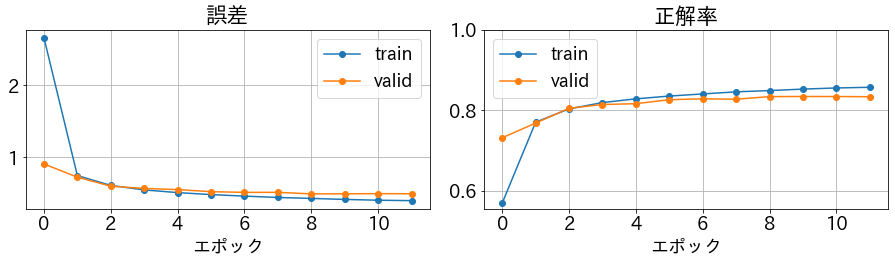

In [ ]:
def show_curve(history):
    fig, (left, right) = plt.subplots(1, 2, figsize=[13, 4])

    left.plot(history.history["loss"], label="train", marker="o")
    left.plot(history.history["val_loss"], label="valid", marker="o")

    right.plot(history.history["accuracy"], label="train", marker="o")
    right.plot(history.history["val_accuracy"], label="valid", marker="o")
    right.set(ylim=[None, 1])

    for ax, title in zip([left, right], ["誤差", "正解率"]):
        ax.legend()
        ax.set(title=title, xlabel="エポック")
        ax.grid(which="both")
    plt.tight_layout()
    return

show_curve(history1)

train（青線）と valid（オレンジ線）はそれぞれ**訓練誤差**と**検証誤差**と呼ばれます。これらは受験における「教科書による勉強」と「模試による評価」で例えると分かりやすいです。

教科書の理解度が深まると模試の点数も上がりますが、ある程度まで行くとある程度まで行くと限界が来ます。もしこのまま学習を続けると、AI は**教科書を理解する**という本当の意味を忘れて、教科書にあるシミの数とかを数え始めた結果、模試の点数を落とすかもしれません。

これは勉強法を変えるか教科書を難しくするなどの対策や、限界が来たら諦めるという選択肢がになります。

しかし、本当の目的は模試ではなく本番の試験です。モデルも同じくテストデータという最終評価のためだけに用意されたデータで評価します。

In [ ]:
your_model.evaluate(test_x, test_t, verbose=1);

3636/3636 [==============================] - 14s 4ms/step - loss: 0.4843 - accuracy: 0.8342


正解率（accuracy）が 80% くらいならまあまあ良いモデルです。全然届いてなければモデルの再構築をする必要があります。

## モデルの分析

「正解率 80% と聞いてどう感じましたか？」

もう少し学習時間があれば精度改善はあるかもしれません。ただ、この資料作成時に色々試しましたが、85% が限界でした。ここからは精度向上に壁がある原因を探ってみましょう。

原因調査の一つに、混同行列を作ってみるという方法があります。

<img src="https://github.com/yuji96/data-science-notes/blob/main/%E6%96%B0%E6%AD%93hands-on/img/cm.jpeg?raw=true" width="400"/>

画像出典: https://analysis-navi.com/?p=553

この図だと、ネコをネコであると AI が正確に識別できたのは 240 回で、ネコをウマだと誤識別したのは 25 回あったと表現されます。良いモデルは対角線上が大きくなります。これを今回のアルファベットのデータでも作成します。

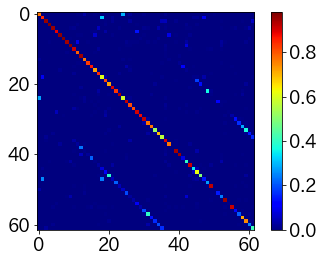

In [ ]:
predict = your_model.predict(test_x)
cm = tf.math.confusion_matrix(test_t, predict.argmax(axis=-1)).numpy()
cm_norm = cm / cm.sum(axis=1)
plt.imshow(cm_norm, cmap="jet")
plt.colorbar();

青から赤になるほど数字が大きいことを意味しています。そこまで悪くないはずなので対角線上に赤っぽい線があると思います。しかし、あることに気づきませんか…？

下のコードを実行すると、間違えやすかったアルファベットが列挙されます。どのような、共通点があるでしょう？

In [ ]:
import pandas as pd

weak = pd.DataFrame({"label": labels, "真陽": cm_norm.diagonal()})
weak.sort_values("真陽").head(10).T

,38,50,54,41,56,47,51,57,52,60
label,c,o,s,f,u,l,p,v,q,y
真陽,0.0,0.002146,0.011442,0.085,0.128631,0.142801,0.146739,0.213675,0.243564,0.246719


下のコードは `o`（小文字のオー）がどこに分類されやすいかを表している図です。
`label = "o"` を `label = "1"` などに変更すると `1` の分類先を見ることもできます。

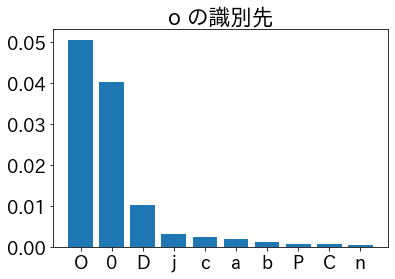

In [ ]:
label = "o"

label_to_target = {v: k for k, v in target_to_label.items()}
target = label_to_target[label]
df = pd.DataFrame({"labels": labels, "pred": cm_norm[target]}).sort_values("pred", ascending=False).head(10)
plt.bar(data=df, x="labels", height="pred")
plt.title(f"{label} の識別先");

このモデルを改善するにはどのようなことをすればいいでしょう…。このアイデアを練ってそれを実際に作っみるというのが、データサイエンスの醍醐味です。

## 使ってみる

これが今回のハンズオンの最後です。
実際に自分で書いた文字をモデルに予測させてみましょう。
左側に字を描けるキャンバスがあり、右側に予測結果が出ます。この予測結果はモデルの自信の強さです。

注意：初回の実行には数分時間がかかります。

In [ ]:
import cv2
from dash import dcc, html, Input, Output
from dash_canvas import DashCanvas
from dash_canvas.utils import parse_jsonstring
from jupyter_dash import JupyterDash
import pandas as pd
import plotly.express as px


model = your_model
app = JupyterDash(__name__)
W = H = 400

app.layout = html.Div([
    DashCanvas(id='canvas', width=W, height=H, lineWidth=35, goButtonTitle="予測する",
               hide_buttons=["zoom", "pan", "line", "pencil", "rectangle", "select"]),
    dcc.Graph(id="graph"),
], style={"display": "flex", "flex-direction": "row"})

@app.callback(Output("graph", "figure"), Input('canvas', 'json_data'))
def read_canvas(string):
    if not string:
        return px.bar()

    image = parse_jsonstring(string).astype(float)[:H, :W] * 255
    image = cv2.resize(image, dsize=(28, 28)).reshape(1, 28, 28)

    predict = pd.DataFrame({"score": model.predict(image).flatten(),
                            "label": labels})
    fig = px.bar(predict.nlargest(10, "score")[::-1], x="score", y="label", orientation='h')
    fig.update_layout(font={"size": 25}, xaxis={'range': [0, 1]})
    return fig

app.run_server(mode="external")

Dash app running on:


<IPython.core.display.Javascript object>

↑青く表示された URL をクリックして下さい。

お疲れ様でした！

今はコードが分からなくても、今から勉強するともしかしたら夏休みくらいには自由研究感覚でなにか作りたいものが作れるようになるかもしれません。

また、今回は `HiddenLayer(100)` などを書いただけでニューラルネットワークができてしまいましたが、それが数学的にはどんな仕組みなのかというのもとても興味深い世界です。